In [1]:
import rdflib
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Step 1: Load and Display Ontologies
# Load your two ontology files (in OWL format)
ontology1_path = "ontology1.owl"
ontology2_path = "ontology2.owl"

In [3]:
ontology1 = rdflib.Graph()
ontology1.parse(ontology1_path, format="xml")  # Replace with the appropriate format if needed

ontology2 = rdflib.Graph()
ontology2.parse(ontology2_path, format="xml")  # Replace with the appropriate format if needed


<Graph identifier=N9fc67062d28d470dbe03003863086ecc (<class 'rdflib.graph.Graph'>)>

In [4]:
# Display a portion of the loaded ontologies
print("Ontology 1:")
for s, p, o in ontology1:
    print(s, p, o)

print("\nOntology 2:")
for s, p, o in ontology2:
    print(s, p, o)

Ontology 1:
Nb261592ed55e4c41ad4fafcea8ed15e3 http://www.w3.org/1999/02/22-rdf-syntax-ns#first http://micro#Reviewer
http://micro#conducts http://www.w3.org/2002/07/owl#inverseOf http://micro#isConductedBy
http://micro#takesPlace http://www.w3.org/2000/01/rdf-schema#range http://micro#Location
http://micro#Reviewer http://www.w3.org/2000/01/rdf-schema#subClassOf http://micro#Organizer
http://micro#ForwardLookingIdea http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://micro#Topic
http://micro#CommitteeMember http://www.w3.org/2000/01/rdf-schema#subClassOf http://micro#Organizer
N7630523a18d446b88e16447a301d68c3 http://www.w3.org/2002/07/owl#unionOf Nb261592ed55e4c41ad4fafcea8ed15e3
Nf4146a6a54c74485a6836544180d115a http://www.w3.org/1999/02/22-rdf-syntax-ns#first http://micro#Compilers
http://micro#OutsideReferee http://www.w3.org/2000/01/rdf-schema#subClassOf http://micro#Person
http://micro#OrganizingCommittee http://www.w3.org/2000/01/rdf-schema#subClassOf N3e85f93a8e2c4704bfe9198

In [5]:
# Step 2: Convert Ontologies to Graphs
# Create NetworkX graphs from the ontologies
G1 = nx.Graph()
for s, p, o in ontology1:
    G1.add_edge(s, o)

G2 = nx.Graph()
for s, p, o in ontology2:
    G2.add_edge(s, o)

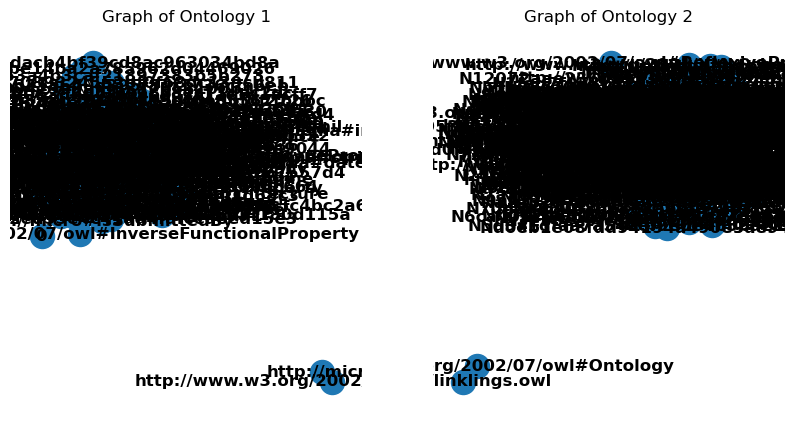

In [6]:
# Step 3: Display Graphs (optional)
# You can visualize the graphs if they are not too large
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 50))
plt.subplot(121)
nx.draw(G1, with_labels=True, font_weight='bold')
plt.title("Graph of Ontology 1")

plt.subplot(122)
nx.draw(G2, with_labels=True, font_weight='bold')
plt.title("Graph of Ontology 2")

plt.show()

In [7]:
# Step 4: Apply Embedding Technique (TF-IDF in this case)
# Convert the ontology graphs into text documents for TF-IDF vectorization
documents1 = [' '.join(G1.neighbors(node)) for node in G1.nodes]
documents2 = [' '.join(G2.neighbors(node)) for node in G2.nodes]


In [8]:
# Create TF-IDF vectors for each ontology
vectorizer = TfidfVectorizer()
tfidf_matrix1 = vectorizer.fit_transform(documents1)
tfidf_matrix2 = vectorizer.transform(documents2)

In [9]:
# Step 5: Calculate Cosine Similarity
# Calculate cosine similarity between the TF-IDF vectors of both ontologies
similarity_matrix = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

In [10]:
# Step 6: Match Entities Based on Similarity (Threshold-Based)
# Define a similarity threshold to consider entities as matching
threshold = 0.7

In [11]:
# Find similar entity pairs based on the similarity matrix
similar_entity_pairs = []

for i in range(len(G1.nodes)):
    for j in range(len(G2.nodes)):
        similarity = similarity_matrix[i][j]
        if similarity >= threshold:
            similar_entity_pairs.append((list(G1.nodes)[i], list(G2.nodes)[j], similarity))


In [12]:
# Display similar entity pairs
print("\nSimilar Entity Pairs:")
for entity1, entity2, similarity in similar_entity_pairs:
    print(f"{entity1} (Graph 1) <-> {entity2} (Graph 2), Similarity: {similarity}")


Similar Entity Pairs:
http://micro#takesPlace (Graph 1) <-> http://linklings#hasPlace (Graph 2), Similarity: 0.7617695985663104
http://micro#takesPlace (Graph 1) <-> http://linklings#isSettingFor (Graph 2), Similarity: 0.7568757441334086
http://micro#takesPlace (Graph 1) <-> http://linklings#hasSetting (Graph 2), Similarity: 0.7617695985663104
http://micro#takesPlace (Graph 1) <-> http://linklings#hasSessionChair (Graph 2), Similarity: 0.7323387716355763
http://micro#takesPlace (Graph 1) <-> http://linklings#isRoleInvolvedIn (Graph 2), Similarity: 0.7323387716355763
http://micro#takesPlace (Graph 1) <-> http://linklings#hasRoleInvolved (Graph 2), Similarity: 0.7323387716355763
http://micro#takesPlace (Graph 1) <-> http://linklings#isSubmissionStatusOf (Graph 2), Similarity: 0.7297445575926941
http://micro#takesPlace (Graph 1) <-> http://linklings#Rejected (Graph 2), Similarity: 0.7094351374946186
http://micro#takesPlace (Graph 1) <-> http://linklings#hasProgramAssigned (Graph 2), Simi